# Step 2: Exploratory Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
business =  pd.read_json("../yelp_training_set/yelp_training_set_business.json", lines=True)
reviews = pd.read_json("../yelp_training_set/yelp_training_set_review.json", lines=True)
checkins = pd.read_json("../yelp_training_set/yelp_training_set_checkin.json", lines=True)
users = pd.read_json("../yelp_training_set/yelp_training_set_user.json", lines=True)
BUJoin = pd.merge(business, reviews, on="business_id", how="inner")

In [3]:
BUJoin["len"]= BUJoin["categories"].apply(lambda x:len(x))


In [4]:
BUJoin.head(1)

,business_id,categories,city,full_address,latitude,longitude,name,neighborhoods,open,review_count,...,state,type_x,date,review_id,stars_y,text,type_y,user_id,votes,len
0,rncjoVoEFUJGCUoC1JgnUA,"[Accountants, Professional Services, Tax Servi...",Peoria,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",33.581867,-112.241596,Peoria Income Tax Service,[],True,3,...,AZ,business,2012-02-12,EnAdKZ_u_wj9ifTRwkfVwg,5,I highly reccomend this place. They helped my ...,review,HK35ai8frY75iMYBVdD_Pg,"{'funny': 0, 'useful': 1, 'cool': 0}",4


## Train Dataset Review's categories length distributions


In [5]:
UniqueLabelsLenCounts= BUJoin.groupby('len').len.count()
UniqueLabelsLenCounts

len
0        777
1       2173
2     110895
3      52106
4      33721
5      21691
6       6273
7       1903
8        177
9        177
10        14
Name: len, dtype: int64

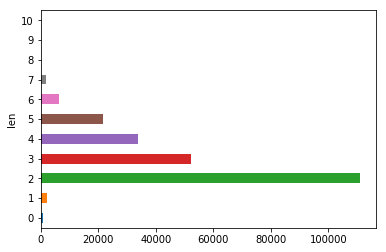

In [6]:
UniqueLabelsLenCounts.plot(kind='barh')
plt.show()

### Unique categories couts

In [7]:
uniqueSet= set()
for l in BUJoin.categories:
    uniqueSet.update(l)
    
len(uniqueSet)

508

### Train Dataset's  categories counts distribution

In [8]:
counts = dict()
for i in uniqueSet:
    for l in BUJoin.categories:
        if i in l:
            counts[i] = counts.get(i, 0) + 1

In [9]:
counts = pd.DataFrame(list(counts.items()), columns=['Categories', 'Counts'])

In [10]:
counts.sort_values("Counts",ascending=False).head(25)

,Categories,Counts
328,Restaurants,158430
93,Food,33217
358,Nightlife,30136
482,Bars,27014
245,American (New),24010
302,Mexican,19953
136,American (Traditional),17693
297,Pizza,14423
266,Shopping,14335
342,Italian,12610


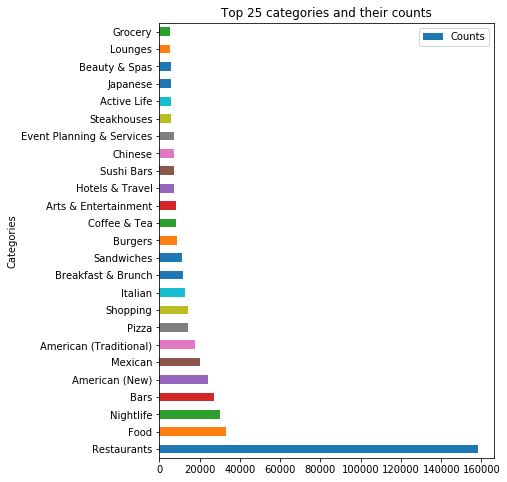

In [11]:
counts.sort_values("Counts",ascending=False).head(25)[:25].plot(kind='barh', x= "Categories", y="Counts", figsize= (6,8), title ="Top 25 categories and their counts")
plt.show()

### Word Cloud

In [12]:
from wordcloud import WordCloud, STOPWORDS


In [21]:

import csv
your_list = []
with open("./train.csv", 'rt') as f:
    reader = csv.reader(f)
    your_list = '\t'.join([i[16] for i in reader])

In [22]:
your_list

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [31]:
wordcloud = WordCloud(stopwords =STOPWORDS, 
                      width=800,
                      background_color='white',
                        height=400,
                     ).generate(your_list)

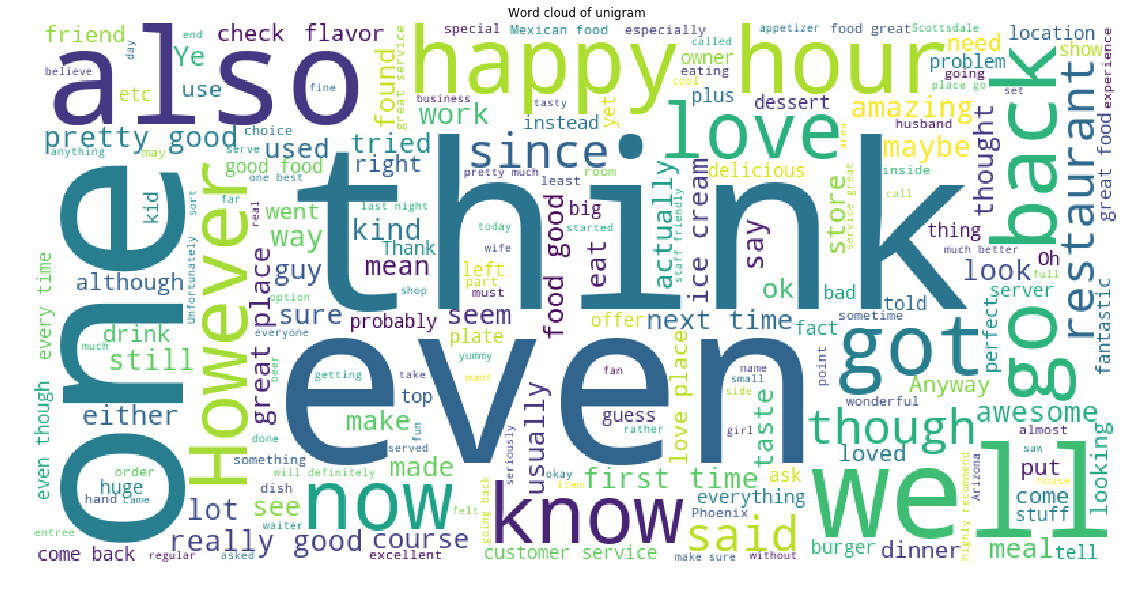

In [48]:
plt.figure( figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word cloud of unigram")
plt.show()
#plt.savefig('wordcloud1.png')



In [82]:
import spacy
def textPreprocessing(doc):
    nlp = spacy.load('en')
    doc = nlp(doc) # phrase to tokenize
    clean = []
    for token in doc:
        #Remove stopwords, punctuations (keep only alphanumeric), remove any unneccessary space. 
        #Tokenization will also remove any new lines character
        if  not (token.is_stop | token.is_punct | token.is_space ):
            #process each token to lemmatisationa and convert to lowercase
            clean.append(token.lemma_.lower())    
    #Remove Pronouns
    clean = [i for i in clean if i not in ["-pron-"]]
    clean = ' '.join(clean)
    return clean

In [83]:
your_list = []
with open("./train.csv", 'rt') as f:
    reader = csv.reader(f)
    your_list = '\t'.join(textPreprocessing([i[16] for i in reader]))

TypeError: Argument 'string' has incorrect type (expected str, got list)